Exploring Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from scipy.linalg import svd
import sys

filepath=r"/Users/davidmiles-skov/Desktop/Academics/Machine Learning/02450 - Introduction to Machine Learning and Data Mining/Project Work/introML/data/processed_cleveland.data"
col_names = np.array(["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang","oldpeak", "slope","ca","thal","num"])
cleveland_data = pd.read_csv(filepath,names =col_names, delimiter=",")

continuous_idx = np.array([0, 3, 4, 7, 9])
cat_idx = np.array([1, 2, 5, 6, 8, 10, 11, 12])
continuous_cols = col_names[continuous_idx]
cat_cols = col_names[cat_idx]

In [2]:
cleveland_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Cleaning up dataframe

In [3]:
print(cleveland_data.to_string())

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca thal  num
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3    3.0  0.0  6.0    0
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5    2.0  3.0  3.0    2
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6    2.0  2.0  7.0    1
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5    3.0  0.0  3.0    0
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4    1.0  0.0  3.0    0
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8    1.0  0.0  3.0    0
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6    3.0  2.0  3.0    3
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6    1.0  0.0  3.0    0
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4    2.0  1.0  7.0    2
9    53.0  1.0  4.0 

Only obvious issue is that "?" beeds to be replaced by "NaN" in columns of "ca" and "thal" (only columns with missing values according to description of data).

In [4]:
cleveland_data.thal=cleveland_data.thal.str.replace("?", "NaN")
cleveland_data.ca=cleveland_data.ca.str.replace("?", "NaN")

Checking for Missing values

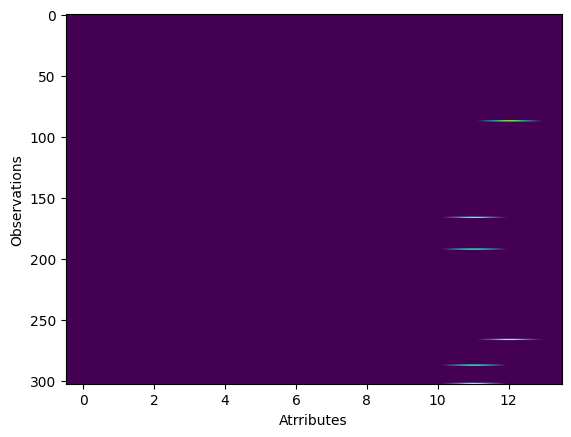

In [5]:
data = np.array(cleveland_data.values, dtype=np.float64)
missing_idx = np.isnan(data)
plt.imshow(missing_idx, aspect='auto')
plt.ylabel("Observations")
plt.xlabel("Atrributes")
plt.show()

In [24]:
print(data)
print(cleveland_data.values)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  2.]
 [67.  1.  4. ...  2.  7.  1.]
 ...
 [57.  1.  4. ...  1.  7.  3.]
 [57.  0.  2. ...  1.  3.  1.]
 [38.  1.  3. ... nan  3.  0.]]
[[63.0 1.0 1.0 ... '0.0' '6.0' 0]
 [67.0 1.0 4.0 ... '3.0' '3.0' 2]
 [67.0 1.0 4.0 ... '2.0' '7.0' 1]
 ...
 [57.0 1.0 4.0 ... '1.0' '7.0' 3]
 [57.0 0.0 2.0 ... '1.0' '3.0' 1]
 [38.0 1.0 3.0 ... 'NaN' '3.0' 0]]


Dropping observations with missing values

(303, 14)
(297, 14)


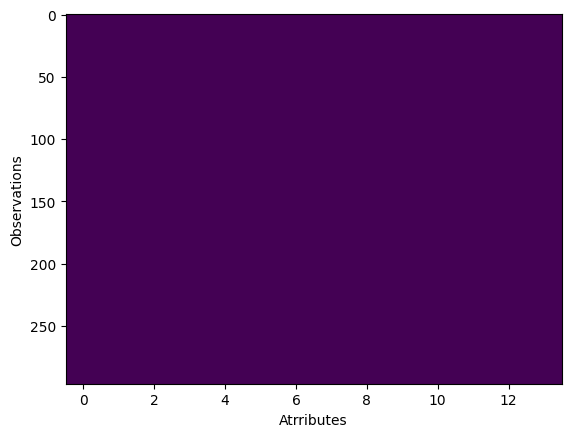

In [7]:
obs_w_missing = np.sum(missing_idx, 1) > 0
data_drop_missing_obs = data[np.logical_not(obs_w_missing), :]
print(data.shape)
print(data_drop_missing_obs.shape)
missing_idx_2 = np.isnan(data_drop_missing_obs)
plt.imshow(missing_idx_2, aspect='auto')
plt.ylabel("Observations")
plt.xlabel("Atrributes")
plt.show()

In [8]:
print(data_drop_missing_obs)

[[63.  1.  1. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  2.]
 [67.  1.  4. ...  2.  7.  1.]
 ...
 [68.  1.  4. ...  2.  7.  2.]
 [57.  1.  4. ...  1.  7.  3.]
 [57.  0.  2. ...  1.  3.  1.]]


Lost 6 observations due to missing data

Performing PCA

Retrieving all continuous data and plotting thalach against chol.

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


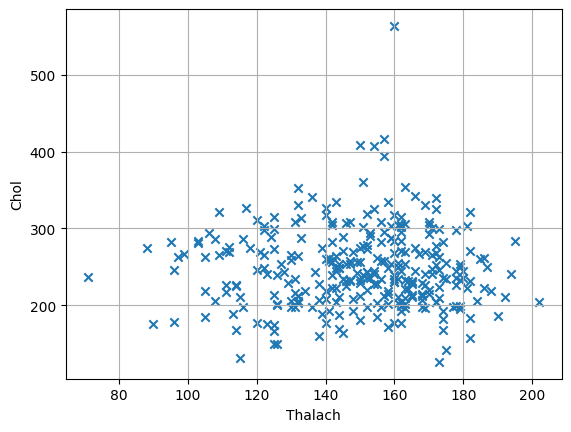

In [9]:
continuous_idx = np.array([0, 3, 4, 7, 9])
print([col_names[i] for i in continuous_idx])

thalach = data_drop_missing_obs[:, 7]
chol = data_drop_missing_obs[:, 4]
plt.scatter(thalach, chol, marker="x")
plt.xlabel("Thalach")
plt.ylabel("Chol")
plt.grid()
plt.show()

In [10]:
X = data_drop_missing_obs[:, continuous_idx]
y = data_drop_missing_obs[:, -1]
print(set(y))
print(X.shape, y.shape)
N, M = X.shape[0], X.shape[1]
C = 5

{0.0, 1.0, 2.0, 3.0, 4.0}
(297, 5) (297,)


1. Standardising data


In [11]:
X_s = (X - np.ones((N, 1))*X.mean(axis=0))/X.std(axis=0)
X_s.shape

(297, 5)

2. Computing SVD

In [12]:
U, S, V = svd(X_s, full_matrices=False)
rho = (S * S) / (S * S).sum()

print(rho)

[0.35937581 0.21941782 0.1741138  0.15313121 0.09396136]


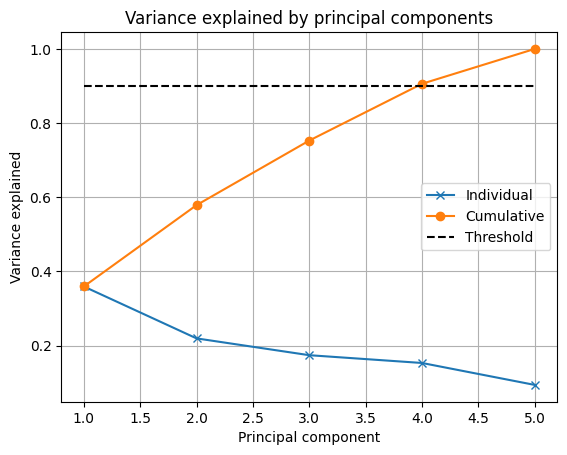

In [13]:
threshold=0.9
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

Text(0, 0.5, 'PC2')

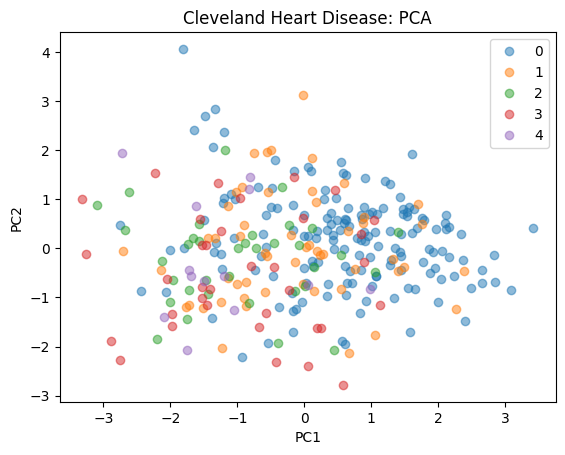

In [14]:
# Project the centered data onto principal component space
Z = X_s @ V.T

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = plt.figure()
plt.title("Cleveland Heart Disease: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend([str(i) for i in range(5)])
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))


Converting $Y$ into binary and plotting

{0, 1}


Text(0, 0.5, 'PC1')

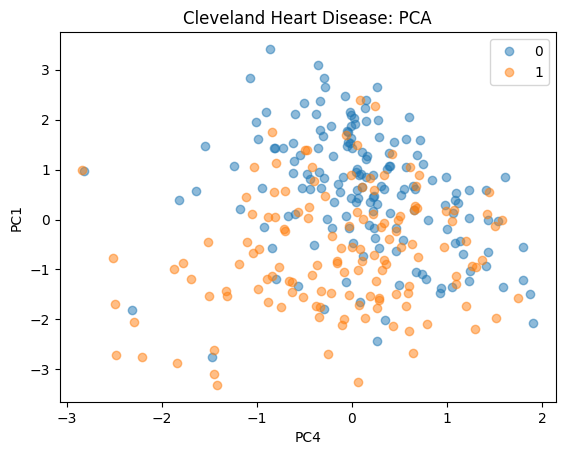

In [26]:
conv_to_bin = lambda x: 1 if x > 0 else 0

y_bin = np.array(list(map(conv_to_bin, y)))
C_bin=2


print(set(y_bin))

# Indices of the principal components to be plotted
i = 3
j = 0

# Plot PCA of the data
f = plt.figure()
plt.title("Cleveland Heart Disease: PCA")
# Z = array(Z)
for c in range(C_bin):
    # select indices belonging to class c:
    class_mask = y_bin == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend([str(i) for i in range(5)])
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

In [15]:
print(np.around(V.T, 2))
print(np.linalg.norm(V.T, axis=1))


[[-0.57  0.12  0.19  0.52  0.6 ]
 [-0.39  0.42 -0.73  0.14 -0.35]
 [-0.23  0.69  0.52 -0.41 -0.17]
 [ 0.51  0.47 -0.32 -0.16  0.63]
 [-0.47 -0.33 -0.23 -0.72  0.32]]
[1. 1. 1. 1. 1.]


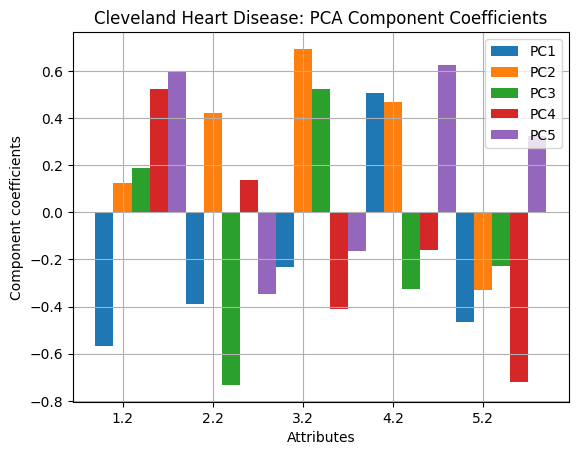

In [16]:
pcs = [0, 1, 2, 3, 4]

legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V.T[:, i], width=bw)
plt.xticks(r + bw, )
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Cleveland Heart Disease: PCA Component Coefficients")
plt.show()


In [17]:
def is_orthonormal(a):
    if not np.allclose(np.sum(a**2, axis=0), 1):  # Check if norms are 1
        return False
    if not np.allclose(a.T @ a, np.eye(a.shape[1])):  # Check if dot products are 0
        return False
    return True

print(is_orthonormal(V.T))
print(S)
print(X_s)

True
[23.10136525 18.05091303 16.07976967 15.07978259 11.81239293]
[[ 0.93618065  0.75038004 -0.27644339  0.01749443  1.06896529]
 [ 1.3789285   1.59626645  0.74455507 -1.81633388  0.38177332]
 [ 1.3789285  -0.65943064 -0.35349988 -0.89941972  1.32666228]
 ...
 [ 1.48961547  0.69398761 -1.04700826 -0.37546878  2.01385425]
 [ 0.27205887 -0.09550637 -2.24138382 -1.51069583  0.12407633]
 [ 0.27205887 -0.09550637 -0.21865103  1.06539633 -0.90671163]]


In [18]:
print(X)

[[ 63.  145.  233.  150.    2.3]
 [ 67.  160.  286.  108.    1.5]
 [ 67.  120.  229.  129.    2.6]
 ...
 [ 68.  144.  193.  141.    3.4]
 [ 57.  130.  131.  115.    1.2]
 [ 57.  130.  236.  174.    0. ]]
